# Task 3: Linear Regression

In [10]:
import pandas as pd

try:
    df_housing = pd.read_csv('Housing.csv')
    display(df_housing.head())
    print(df_housing.shape)
except FileNotFoundError:
    print("Error: 'Housing.csv' not found. Please ensure the file is in the correct location.")
    df_housing = None
    # Set df_housing to None in case of error
except Exception as e:
    print(f"An error occurred: {e}")
    df_housing = None
    # Set df_housing to None in case of error

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


(545, 13)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

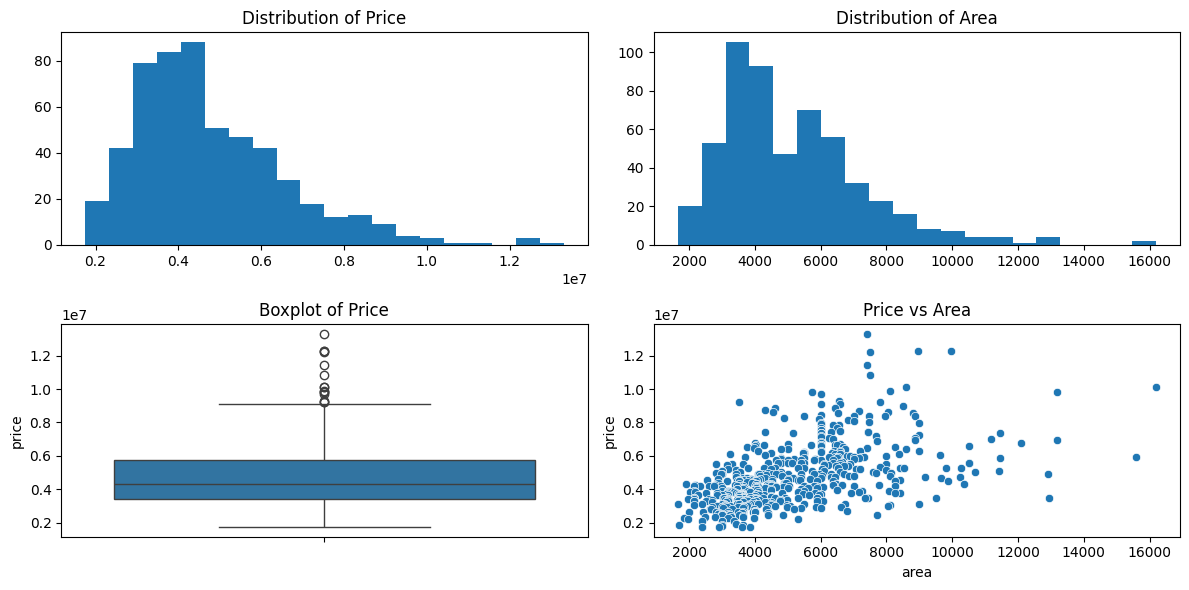


Value counts for mainroad:
mainroad
yes    468
no      77
Name: count, dtype: int64


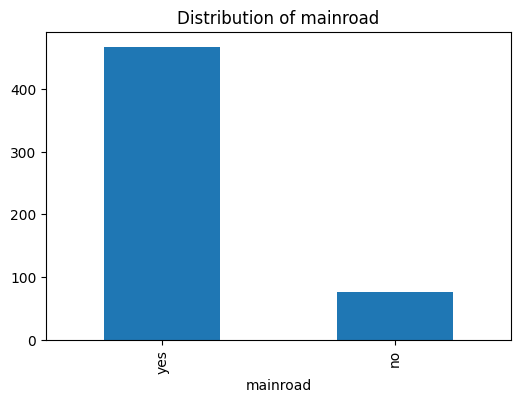


Value counts for guestroom:
guestroom
no     448
yes     97
Name: count, dtype: int64


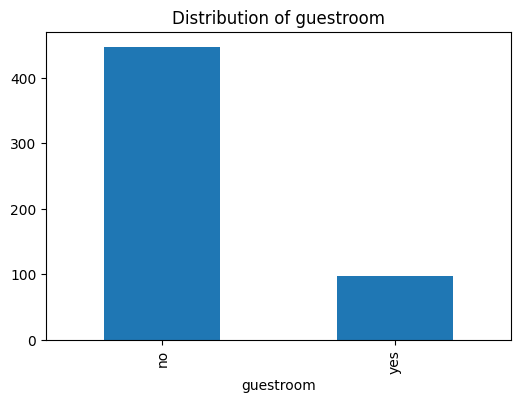


Value counts for basement:
basement
no     354
yes    191
Name: count, dtype: int64


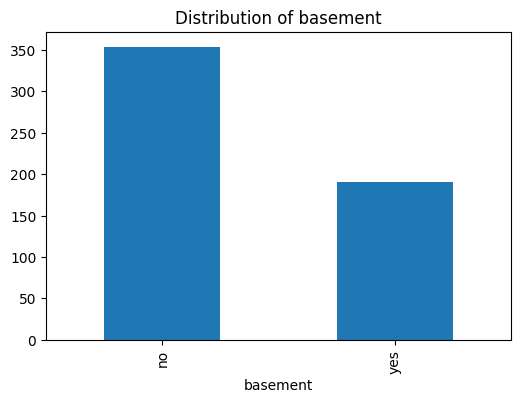


Value counts for hotwaterheating:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64


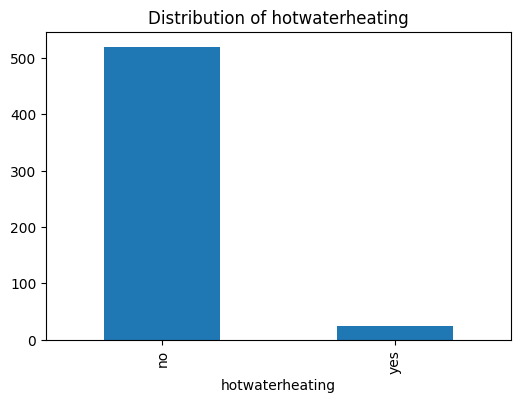


Value counts for airconditioning:
airconditioning
no     373
yes    172
Name: count, dtype: int64


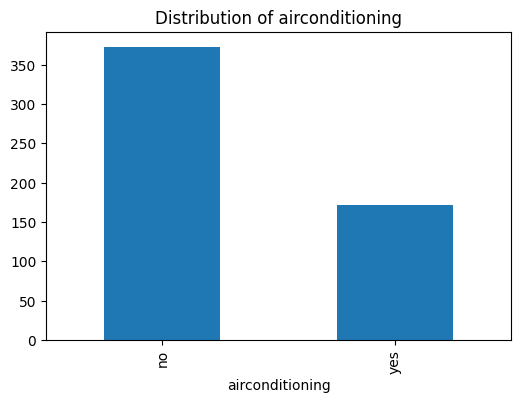


Value counts for prefarea:
prefarea
no     417
yes    128
Name: count, dtype: int64


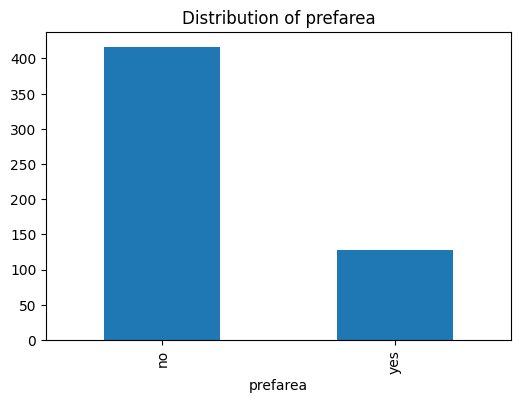


Value counts for furnishingstatus:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


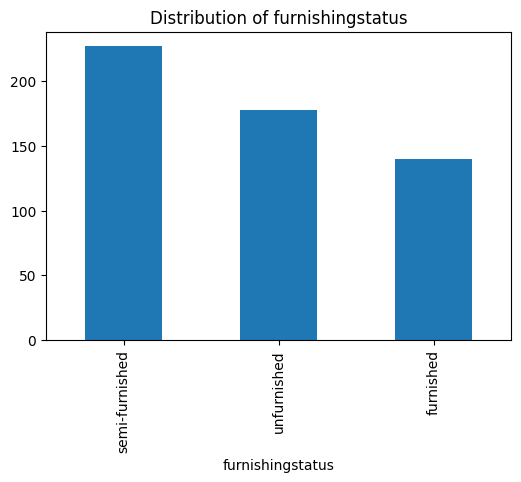

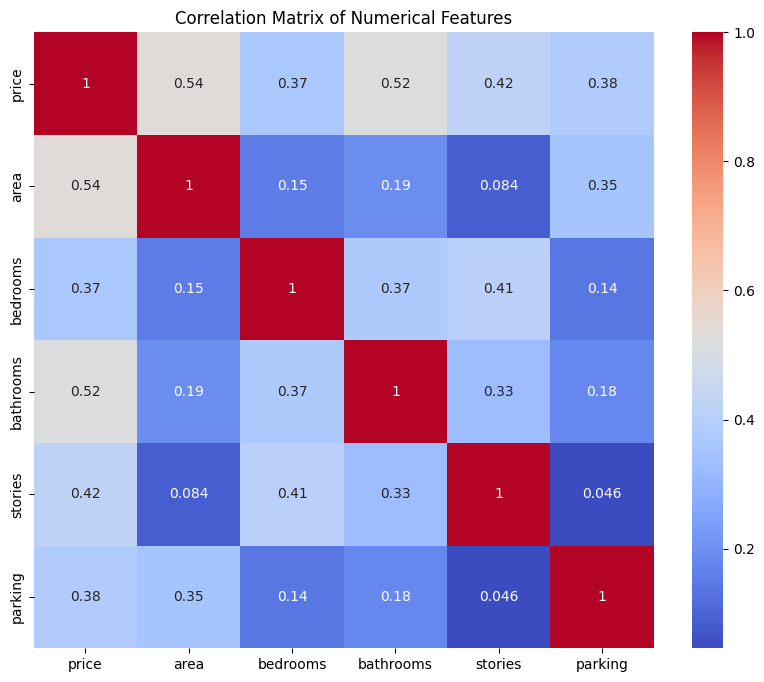

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine the first few rows (already done in previous step)
# 2. Check data types
print(df_housing.info())

# 3. Descriptive statistics
print(df_housing.describe())

# 4. Check for missing values
print(df_housing.isnull().sum())

# 5. Visualize distributions of key numerical features
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(df_housing['price'], bins=20)
plt.title('Distribution of Price')

plt.subplot(2, 2, 2)
plt.hist(df_housing['area'], bins=20)
plt.title('Distribution of Area')

plt.subplot(2, 2, 3)
sns.boxplot(y=df_housing['price'])
plt.title('Boxplot of Price')

plt.subplot(2, 2, 4)
sns.scatterplot(x='area', y='price', data=df_housing)
plt.title('Price vs Area')

plt.tight_layout()
plt.show()

# 6. Examine categorical features
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    print(f"\nValue counts for {col}:\n{df_housing[col].value_counts()}")
    plt.figure(figsize=(6,4))
    df_housing[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

# 7. Correlation matrix and heatmap
correlation_matrix = df_housing.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

              price         area    bedrooms   bathrooms     stories  \
count  5.450000e+02   545.000000  545.000000  545.000000  545.000000   
mean   4.697153e+06  5045.475229    2.965138    1.286239    1.805505   
std    1.673516e+06  1870.596738    0.738064    0.502470    0.867492   
min    1.750000e+06  1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06  3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06  4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06  6360.000000    3.000000    2.000000    2.000000   
max    8.400000e+06  9000.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


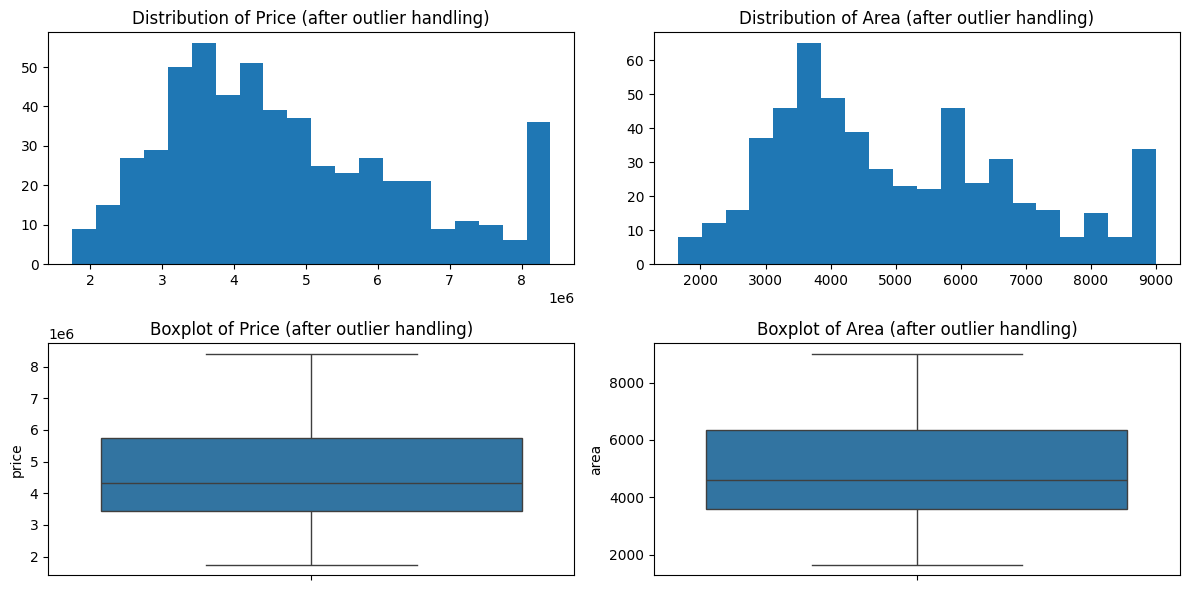

In [13]:
# No missing values were found in the previous step, so no imputation is needed.

# Handle outliers in 'price' and 'area'
# Cap values at the 95th percentile
upper_limit_price = df_housing['price'].quantile(0.95)
df_housing['price'] = df_housing['price'].clip(upper=upper_limit_price)

upper_limit_area = df_housing['area'].quantile(0.95)
df_housing['area'] = df_housing['area'].clip(upper=upper_limit_area)

# Verify the changes
print(df_housing.describe())

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(df_housing['price'], bins=20)
plt.title('Distribution of Price (after outlier handling)')

plt.subplot(2, 2, 2)
plt.hist(df_housing['area'], bins=20)
plt.title('Distribution of Area (after outlier handling)')

plt.subplot(2, 2, 3)
sns.boxplot(y=df_housing['price'])
plt.title('Boxplot of Price (after outlier handling)')

plt.subplot(2, 2, 4)
sns.boxplot(y=df_housing['area'])
plt.title('Boxplot of Area (after outlier handling)')

plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np

# Identify categorical features
categorical_cols = df_housing.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = ohe.fit_transform(df_housing[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_cols))
df_housing = df_housing.drop(columns=categorical_cols)
df_housing = pd.concat([df_housing, encoded_df], axis=1)

# Scale numerical features (excluding 'price')
numerical_cols = df_housing.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('price')

scaler = StandardScaler()
df_housing[numerical_cols] = scaler.fit_transform(df_housing[numerical_cols])

# Inspect the updated DataFrame
print(df_housing.info())
print(df_housing.describe())
display(df_housing.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    int64  
 1   area                             545 non-null    float64
 2   bedrooms                         545 non-null    float64
 3   bathrooms                        545 non-null    float64
 4   stories                          545 non-null    float64
 5   parking                          545 non-null    float64
 6   mainroad_no                      545 non-null    float64
 7   mainroad_yes                     545 non-null    float64
 8   guestroom_no                     545 non-null    float64
 9   guestroom_yes                    545 non-null    float64
 10  basement_no                      545 non-null    float64
 11  basement_yes                     545 non-null    float64
 12  hotwaterheating_no    

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,8400000,1.270560,1.403419,1.421812,1.378217,1.517692,-0.405623,0.405623,0.465315,-0.465315,...,-0.734539,0.219265,-0.219265,-1.472618,1.472618,-1.804941,1.804941,1.700840,-0.844888,-0.696429
1,8400000,2.094583,1.403419,5.405809,2.532024,2.679409,-0.405623,0.405623,0.465315,-0.465315,...,-0.734539,0.219265,-0.219265,-1.472618,1.472618,0.554035,-0.554035,1.700840,-0.844888,-0.696429
2,8400000,2.115987,0.047278,1.421812,0.224410,1.517692,-0.405623,0.405623,0.465315,-0.465315,...,1.361397,0.219265,-0.219265,0.679063,-0.679063,-1.804941,1.804941,-0.587945,1.183588,-0.696429
3,8400000,1.313367,1.403419,1.421812,0.224410,2.679409,-0.405623,0.405623,0.465315,-0.465315,...,1.361397,0.219265,-0.219265,-1.472618,1.472618,-1.804941,1.804941,1.700840,-0.844888,-0.696429
4,8400000,1.270560,1.403419,-0.570187,0.224410,1.517692,-0.405623,0.405623,-2.149083,2.149083,...,1.361397,0.219265,-0.219265,-1.472618,1.472618,0.554035,-0.554035,1.700840,-0.844888,-0.696429


In [15]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_housing.drop('price', axis=1)
y = df_housing['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (436, 20)
X_test shape: (109, 20)
y_train shape: (436,)
y_test shape: (109,)


In [16]:
from sklearn.linear_model import LinearRegression

# Create instances of the LinearRegression class
simple_model = LinearRegression()
multiple_model = LinearRegression()

# Train the simple linear regression model
simple_model.fit(X_train['area'].values.reshape(-1, 1), y_train)

# Train the multiple linear regression model
multiple_model.fit(X_train, y_train)

LinearRegression()

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using the simple linear regression model
y_pred_simple = simple_model.predict(X_test['area'].values.reshape(-1, 1))

# Predict using the multiple linear regression model
y_pred_multiple = multiple_model.predict(X_test)

# Evaluate the simple linear regression model
mae_simple = mean_absolute_error(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

# Evaluate the multiple linear regression model
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

# Print the evaluation metrics
print("Simple Linear Regression:")
print(f"MAE: {mae_simple:.2f}")
print(f"MSE: {mse_simple:.2f}")
print(f"R-squared: {r2_simple:.2f}")
print("\nMultiple Linear Regression:")
print(f"MAE: {mae_multiple:.2f}")
print(f"MSE: {mse_multiple:.2f}")
print(f"R-squared: {r2_multiple:.2f}")

Simple Linear Regression:
MAE: 1320813.24
MSE: 2533101858252.54
R-squared: 0.30

Multiple Linear Regression:
MAE: 846990.00
MSE: 1137073036840.69
R-squared: 0.68


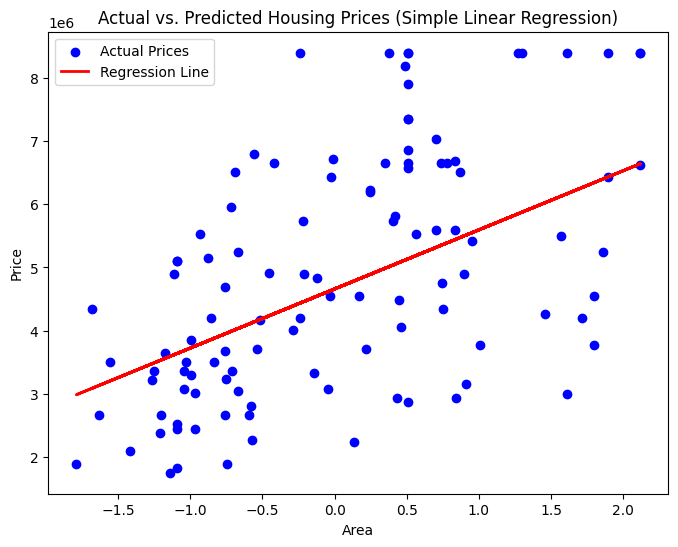

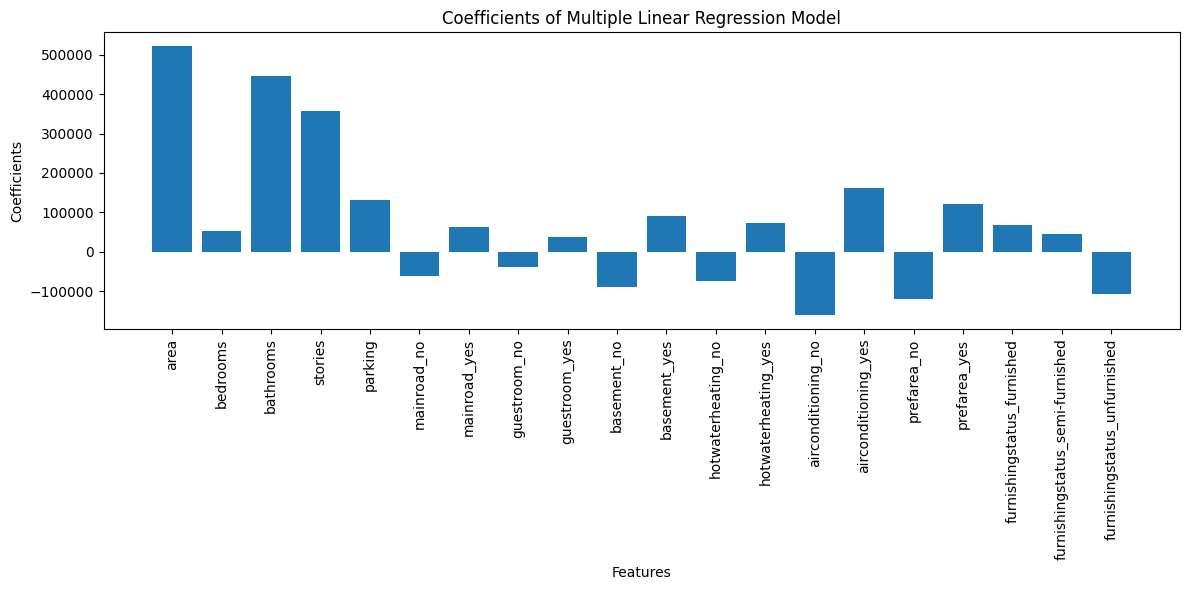

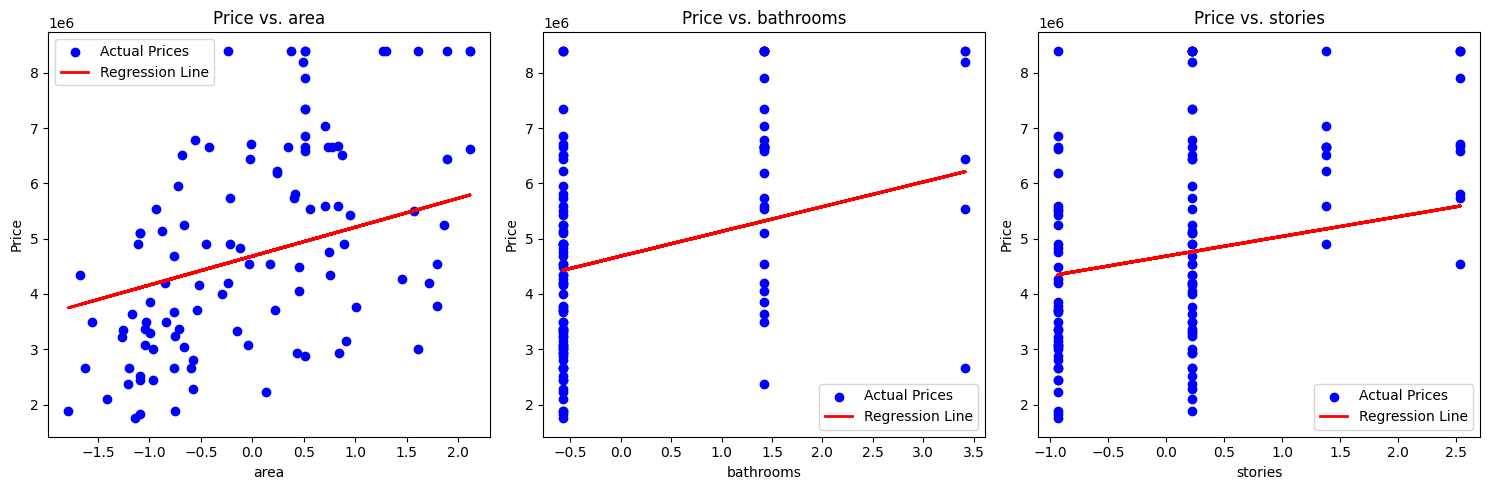

In [18]:
import matplotlib.pyplot as plt

# 1. Scatter plot of actual vs. predicted housing prices (simple linear regression)
plt.figure(figsize=(8, 6))
plt.scatter(X_test['area'], y_test, color='blue', label='Actual Prices')
plt.plot(X_test['area'], y_pred_simple, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Housing Prices (Simple Linear Regression)')
plt.legend()
plt.show()

# 2. Plot coefficients of the multiple linear regression model
plt.figure(figsize=(12, 6))
plt.bar(X_train.columns, multiple_model.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Multiple Linear Regression Model')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# 3. Scatter plots for the most important features
important_features = ['area', 'bathrooms', 'stories'] # Based on the coefficient plot, can be tuned

plt.figure(figsize=(15, 5))

for i, feature in enumerate(important_features):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X_test[feature], y_test, color='blue', label='Actual Prices')

    # Predict using only the current feature for visualization
    y_pred_feature = multiple_model.coef_[X_train.columns.get_loc(feature)] * X_test[feature] + multiple_model.intercept_

    plt.plot(X_test[feature], y_pred_feature, color='red', linewidth=2, label='Regression Line') # Only the slope and intercept relevant to the feature
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'Price vs. {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

# 4. Skip 3D plot due to complexity

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Analyze coefficients
coef_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': multiple_model.coef_})
coef_df = coef_df.sort_values(by='coefficient', ascending=False)
display(coef_df)

# Identify features with small coefficients (e.g., absolute coefficient < 0.1)
features_to_remove = coef_df[coef_df['coefficient'].abs() < 0.1]['feature'].tolist()
print("Features to remove:", features_to_remove)

# Retrain the model without insignificant features
X_train_reduced = X_train.drop(columns=features_to_remove)
X_test_reduced = X_test.drop(columns=features_to_remove)
multiple_model_reduced = LinearRegression()
multiple_model_reduced.fit(X_train_reduced, y_train)

# Make predictions and evaluate the reduced model
y_pred_reduced = multiple_model_reduced.predict(X_test_reduced)
mae_reduced = mean_absolute_error(y_test, y_pred_reduced)
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

# Print evaluation metrics for the reduced model
print("\nMultiple Linear Regression (Reduced):")
print(f"MAE: {mae_reduced:.2f}")
print(f"MSE: {mse_reduced:.2f}")
print(f"R-squared: {r2_reduced:.2f}")


# Explore regularization (Ridge and Lasso)
alpha_values = [0.01, 0.1, 1, 10]  # Example alpha values

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_reduced, y_train)
    y_pred_ridge = ridge_model.predict(X_test_reduced)
    mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)

    print(f"\nRidge Regression (alpha={alpha}):")
    print(f"MAE: {mae_ridge:.2f}")
    print(f"MSE: {mse_ridge:.2f}")
    print(f"R-squared: {r2_ridge:.2f}")

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_reduced, y_train)
    y_pred_lasso = lasso_model.predict(X_test_reduced)
    mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)

    print(f"\nLasso Regression (alpha={alpha}):")
    print(f"MAE: {mae_lasso:.2f}")
    print(f"MSE: {mse_lasso:.2f}")
    print(f"R-squared: {r2_lasso:.2f}")

,feature,coefficient
0,area,522715.520578
2,bathrooms,447242.918349
3,stories,357503.428735
14,airconditioning_yes,161861.545836
4,parking,130408.799078
16,prefarea_yes,120749.839762
10,basement_yes,89521.578989
12,hotwaterheating_yes,73928.058116
17,furnishingstatus_furnished,66518.759344
6,mainroad_yes,62289.162973


Features to remove: []

Multiple Linear Regression (Reduced):
MAE: 846990.00
MSE: 1137073036840.69
R-squared: 0.68

Ridge Regression (alpha=0.01):
MAE: 846987.09
MSE: 1137069896850.84
R-squared: 0.68

Lasso Regression (alpha=0.01):
MAE: 846990.00
MSE: 1137073049540.06
R-squared: 0.68

Ridge Regression (alpha=0.1):
MAE: 846960.95
MSE: 1137041700911.87
R-squared: 0.68

Lasso Regression (alpha=0.1):
MAE: 846990.04
MSE: 1137073162321.51
R-squared: 0.68

Ridge Regression (alpha=1):
MAE: 846700.92
MSE: 1136766038613.09
R-squared: 0.68

Lasso Regression (alpha=1):
MAE: 846990.44
MSE: 1137074314896.27
R-squared: 0.68

Ridge Regression (alpha=10):
MAE: 844269.62
MSE: 1134605110375.20
R-squared: 0.68

Lasso Regression (alpha=10):
MAE: 846994.30
MSE: 1137085756383.97
R-squared: 0.68
